# Bayesian Bivariate Model

In [1]:
import sys

sys.path.append("../../")

import matplotlib.pyplot as plt
import pandas as pd

import penaltyblog as pb

## Get data from football-data.co.uk

In [2]:
df = pd.concat(
    [
        pb.scrapers.FootballData("ENG Premier League", "2017-2018").get_fixtures(),
        pb.scrapers.FootballData("ENG Premier League", "2018-2019").get_fixtures(),
        pb.scrapers.FootballData("ENG Premier League", "2019-2020").get_fixtures(),
        pb.scrapers.FootballData("ENG Premier League", "2020-2021").get_fixtures(),
        pb.scrapers.FootballData("ENG Premier League", "2021-2022").get_fixtures(),
    ]
)

df

,date,season,competition,div,team_home,team_away,fthg,ftag,ftr,hthg,...,avg_c<2.5,ah_ch,b365_cahh,b365_caha,pcahh,pcaha,max_cahh,max_caha,avg_cahh,avg_caha
id,,,,,,,,,,,,,,,,,,,,,
1502409600---arsenal---leicester,2017-08-11,2017-2018,ENG Premier League,E0,Arsenal,Leicester,4,3,H,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502496000---brighton---man_city,2017-08-12,2017-2018,ENG Premier League,E0,Brighton,Man City,0,2,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502496000---chelsea---burnley,2017-08-12,2017-2018,ENG Premier League,E0,Chelsea,Burnley,2,3,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502496000---crystal_palace---huddersfield,2017-08-12,2017-2018,ENG Premier League,E0,Crystal Palace,Huddersfield,0,3,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502496000---everton---stoke,2017-08-12,2017-2018,ENG Premier League,E0,Everton,Stoke,1,0,H,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653177600---crystal_palace---man_united,2022-05-22,2021-2022,ENG Premier League,E0,Crystal Palace,Man United,1,0,H,1,...,2.04,0.25,1.68,2.15,1.74,2.23,1.88,2.25,1.74,2.16
1653177600---leicester---southampton,2022-05-22,2021-2022,ENG Premier League,E0,Leicester,Southampton,4,1,H,0,...,2.63,-0.75,1.83,2.07,1.88,2.03,1.94,2.26,1.87,2.01
1653177600---liverpool---wolves,2022-05-22,2021-2022,ENG Premier League,E0,Liverpool,Wolves,3,1,H,1,...,3.28,-2.50,2.02,1.77,2.06,1.83,2.19,1.99,2.07,1.80


In [12]:
def logic(ctx):
    fixture = ctx.fixture
    account = ctx.account

    if 3. <= fixture["b365_a"] <= 4.:
        account.place_bet(
            fixture["b365_a"],
            account.current_bankroll * 0.03,
            1 if ctx.fixture["ftr"] == "A" else 0,
        )

In [13]:
backtest = pb.backtest.Backtest(df, "2018-01-01", "2022-06-01", False)
backtest.start(100, logic)
backtest.results()

{'Total Bets': 353,
 'Successful Bets': 105,
 'Successful Bet %': 29.745042492917843,
 'Max Bankroll': 149.74203570267858,
 'Profit': -27.822755378115218,
 'ROI': -27.822755378115215}

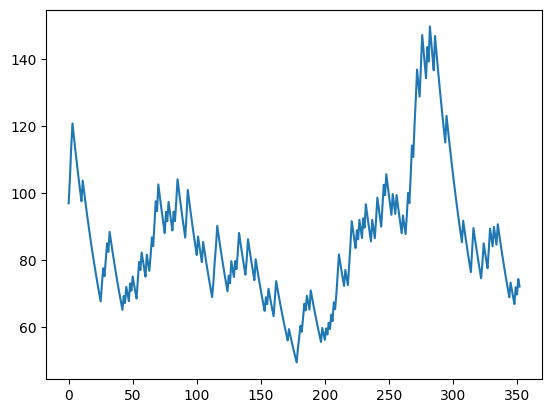

In [14]:
plt.plot(backtest.account.tracker)